**Sistemas Difusos**

* _Maria Alejandra Bonilla Diaz - 20251595002_ 
* _Alvaro Alejandro Zarabanda Gutierrez – 20251595006_



In [ ]:
%%capture
# !pip install numpy matplotlib

import numpy as np
import matplotlib.pyplot as plt
import funciones

In [ ]:
# --- Definición de Universos y Conjuntos Difusos ---

universo_temp = np.linspace(0, 50, 1000)
universo_pres = np.linspace(0, 10, 1000)

# Conjuntos difusos para Temperatura (T)
conjuntos_T = {
    'TA': {'nombre': 'Muy Baja', 'tipo': 'trapezoidal', 'parametros': [0, 0, 5, 15]},
    'TB': {'nombre': 'Baja', 'tipo': 'triangular', 'parametros': [5, 15, 25]},
    'TC': {'nombre': 'Media', 'tipo': 'triangular', 'parametros': [15, 25, 35]},
    'TD': {'nombre': 'Alta', 'tipo': 'triangular', 'parametros': [25, 35, 45]},
    'TE': {'nombre': 'Muy Alta', 'tipo': 'trapezoidal', 'parametros': [35, 45, 50, 50]}
}

# Conjuntos difusos para Presión (P)
conjuntos_P = {
    'PA': {'nombre': 'Muy pequeña', 'tipo': 'trapezoidal', 'parametros': [0, 0, 1, 3]},
    'PB': {'nombre': 'Pequeña', 'tipo': 'triangular', 'parametros': [1, 3, 5]},
    'PC': {'nombre': 'Media', 'tipo': 'triangular', 'parametros': [3, 5, 7]},
    'PD': {'nombre': 'Grande', 'tipo': 'triangular', 'parametros': [5, 7, 9]},
    'PE': {'nombre': 'Muy grande', 'tipo': 'trapezoidal', 'parametros': [7, 9, 10, 10]}
}


Considere las siguientes funciones de pertenencia, las cuales describen dos variables fuzzy T y P. La variable T esta asociada a la temperatura (variable de entrada) de un proceso industrial. La variable P representa la Presión (variable de salida). 

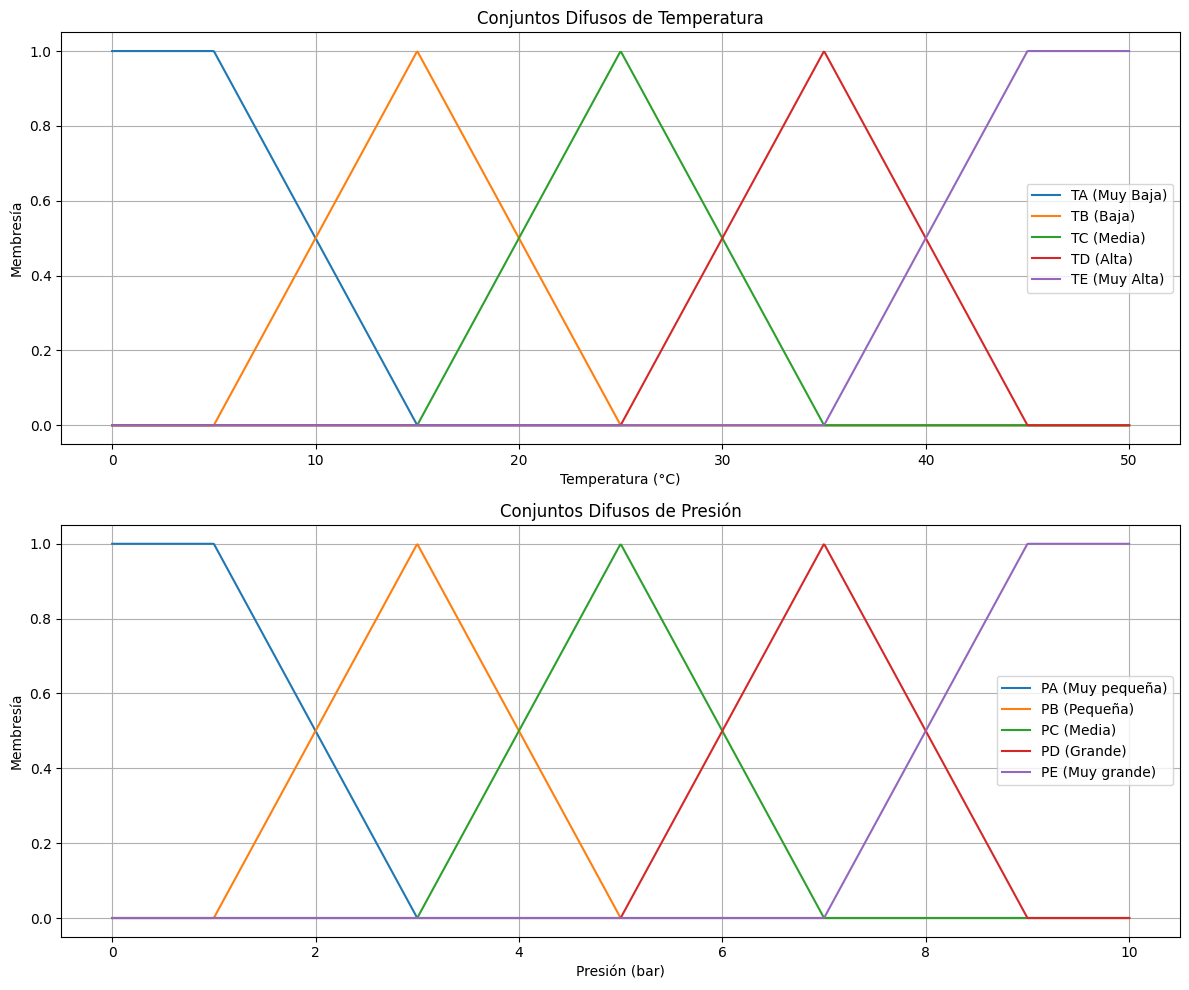

In [ ]:
# --- Visualización de los conjuntos difusos ---

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Gráfico de Temperatura
ax1.set_title('Conjuntos Difusos de Temperatura')
for id_conj, datos in conjuntos_T.items():
    y = membresia_difusa(universo_temp, datos['tipo'], datos['parametros'])
    ax1.plot(universo_temp, y, label=f"{id_conj} ({datos['nombre']})")
ax1.set_xlabel('Temperatura (°C)')
ax1.set_ylabel('Membresía')
ax1.legend()
ax1.grid(True)

# Gráfico de Presión
ax2.set_title('Conjuntos Difusos de Presión')
for id_conj, datos in conjuntos_P.items():
    y = membresia_difusa(universo_pres, datos['tipo'], datos['parametros'])
    ax2.plot(universo_pres, y, label=f"{id_conj} ({datos['nombre']})")
ax2.set_xlabel('Presión (bar)')
ax2.set_ylabel('Membresía')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Considerando el proceso de inferencia Modus-Ponens generalizado y siendo que a partir de los valores de temperatura se desea obtener la presión, el conjunto de reglas fuzzy es dado por las siguientes sentencias:
- Si (Temperatura es $T_A$) entonces (Presión es $P_C$)
- Si (Temperatura es $T_B$) entonces (Presión es $P_A$)
- Si (Temperatura es $T_C$) entonces (Presión es $P_D$)
- Si (Temperatura es $T_D$) entonces (Presión es $P_E$)
- Si (Temperatura es $T_E$) entonces (Presión es $P_B$)

In [ ]:
reglas = {
    'R1': {'antecedente': 'TA', 'consecuente': 'PC'},
    'R2': {'antecedente': 'TB', 'consecuente': 'PA'},
    'R3': {'antecedente': 'TC', 'consecuente': 'PD'},
    'R4': {'antecedente': 'TD', 'consecuente': 'PE'},
    'R5': {'antecedente': 'TE', 'consecuente': 'PB'}
}

## 2. Análisis de Entradas y Reglas Activas

A continuación, se realiza el proceso de fuzzificación para cada una de las temperaturas de entrada. Se determina el grado de pertenencia a los conjuntos difusos de temperatura y se identifican las reglas que se activan.

In [ ]:
def analizar_entrada(temp_entrada):
    """
    Analiza una temperatura de entrada para encontrar los conjuntos difusos y reglas activas.
    """
    print(f"--- Análisis para Temperatura = {temp_entrada}°C ---")
    
    fuerzas_activacion = {}
    
    # 1. Fuzzificación: Calcular grado de pertenencia para cada conjunto de Temperatura
    for id_conj, datos in conjuntos_T.items():
        mu = membresia_difusa(np.array([temp_entrada]), datos['tipo'], datos['parametros'])[0]
        if mu > 0:
            fuerzas_activacion[id_conj] = mu
            print(f"  - Grado de pertenencia a '{datos['nombre']}' ({id_conj}): {mu:.4f}")

    # 2. Reglas activadas
    if not fuerzas_activacion:
        print("  - No se activó ningún conjunto difuso.")
        return {}

    print("\\n  Reglas activadas:")
    reglas_activadas = {}
    for id_regla, datos_regla in reglas.items():
        antecedente = datos_regla['antecedente']
        if antecedente in fuerzas_activacion:
            fuerza = fuerzas_activacion[antecedente]
            consecuente = datos_regla['consecuente']
            reglas_activadas[id_regla] = {'fuerza': fuerza, 'consecuente': consecuente}
            print(f"  - {id_regla}: Si T es {antecedente} ({conjuntos_T[antecedente]['nombre']}) -> P es {consecuente} ({conjuntos_P[consecuente]['nombre']}). Fuerza: {fuerza:.4f}")
            
    print("-" * 40)
    return reglas_activadas

# Temperaturas de entrada del enunciado
temperaturas_entrada = [13.3, 18.8, 30.0, 42.3, 47.0]

# Almacenar los resultados para los siguientes pasos
resultados_analisis = {}
for temp in temperaturas_entrada:
    resultados_analisis[temp] = analizar_entrada(temp)

--- Análisis para Temperatura = 13.3°C ---
  - Grado de pertenencia a 'Muy Baja' (TA): 0.1700
  - Grado de pertenencia a 'Baja' (TB): 0.8300
\n  Reglas activadas:
  - R1: Si T es TA (Muy Baja) -> P es PC (Media). Fuerza: 0.1700
  - R2: Si T es TB (Baja) -> P es PA (Muy pequeña). Fuerza: 0.8300
----------------------------------------
--- Análisis para Temperatura = 18.8°C ---
  - Grado de pertenencia a 'Baja' (TB): 0.6200
  - Grado de pertenencia a 'Media' (TC): 0.3800
\n  Reglas activadas:
  - R2: Si T es TB (Baja) -> P es PA (Muy pequeña). Fuerza: 0.6200
  - R3: Si T es TC (Media) -> P es PD (Grande). Fuerza: 0.3800
----------------------------------------
--- Análisis para Temperatura = 30.0°C ---
  - Grado de pertenencia a 'Media' (TC): 0.5000
  - Grado de pertenencia a 'Alta' (TD): 0.5000
\n  Reglas activadas:
  - R3: Si T es TC (Media) -> P es PD (Grande). Fuerza: 0.5000
  - R4: Si T es TD (Alta) -> P es PE (Muy grande). Fuerza: 0.5000
----------------------------------------
---

## 3. Inferencia con Operador de Mamdani (Max-Min)

En esta sección, se implementa el proceso de inferencia utilizando el operador de Mamdani (composición Max-Min). Para cada regla activada, la función de pertenencia del consecuente se "recorta" a la altura de la fuerza de activación del antecedente.

In [ ]:
def implicacion_mamdani(fuerza, conjunto_salida):
    """
    Aplica el operador de implicación de Mamdani (min).
    Recorta el conjunto de salida a la altura de la fuerza de activación.
    """
    return np.minimum(fuerza, conjunto_salida)

# Calcular las regiones de salida para cada temperatura usando Mamdani
regiones_mamdani = {}
for temp, activadas in resultados_analisis.items():
    regiones_temp = {}
    for id_regla, datos_regla in activadas.items():
        fuerza = datos_regla['fuerza']
        id_consecuente = datos_regla['consecuente']
        
        # Obtener el conjunto difuso de salida original
        datos_consecuente = conjuntos_P[id_consecuente]
        conjunto_salida_original = membresia_difusa(universo_pres, datos_consecuente['tipo'], datos_consecuente['parametros'])
        
        # Aplicar implicación de Mamdani
        region_implicada = implicacion_mamdani(fuerza, conjunto_salida_original)
        regiones_temp[id_regla] = region_implicada
        
    regiones_mamdani[temp] = regiones_temp

print("Se han calculado las regiones de salida para cada regla activada usando el operador de Mamdani.")
# Los gráficos se generarán en el siguiente paso.

Se han calculado las regiones de salida para cada regla activada usando el operador de Mamdani.


## 4. Visualización de Resultados (Mamdani)

Se procede a graficar las regiones de salida individuales para cada regla activada. Cuando dos reglas se activan simultáneamente para una misma temperatura, sus gráficos se muestran uno al lado del otro para facilitar la comparación.

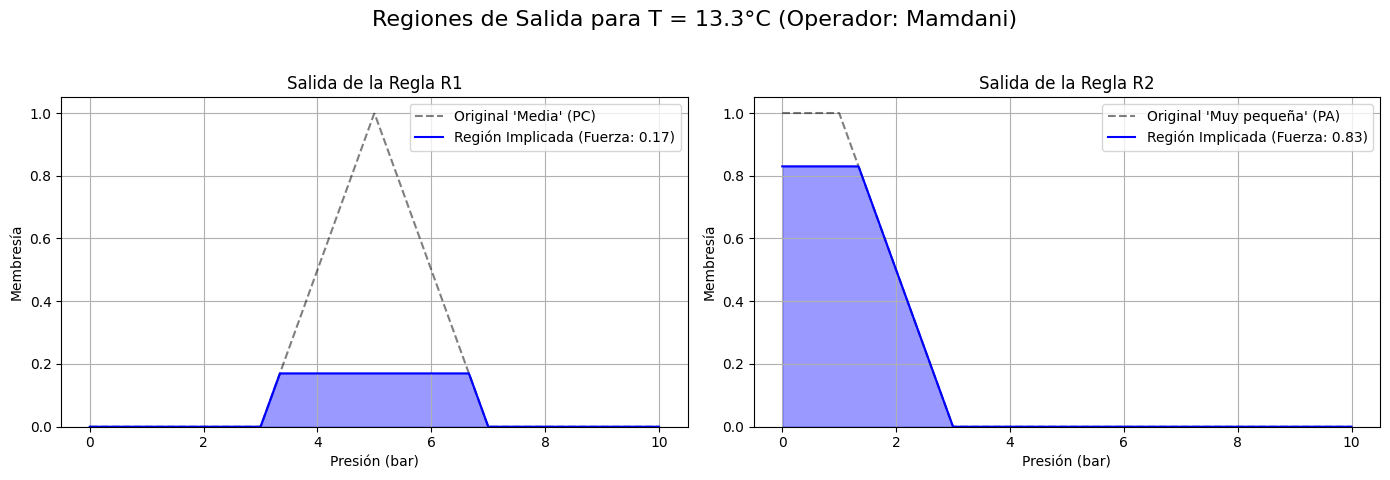

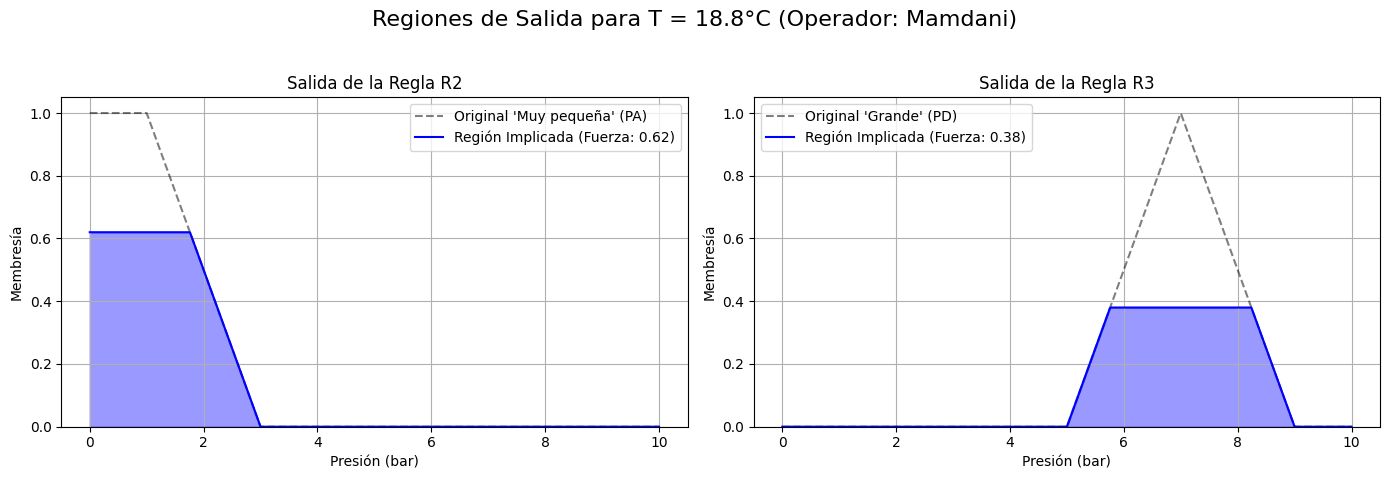

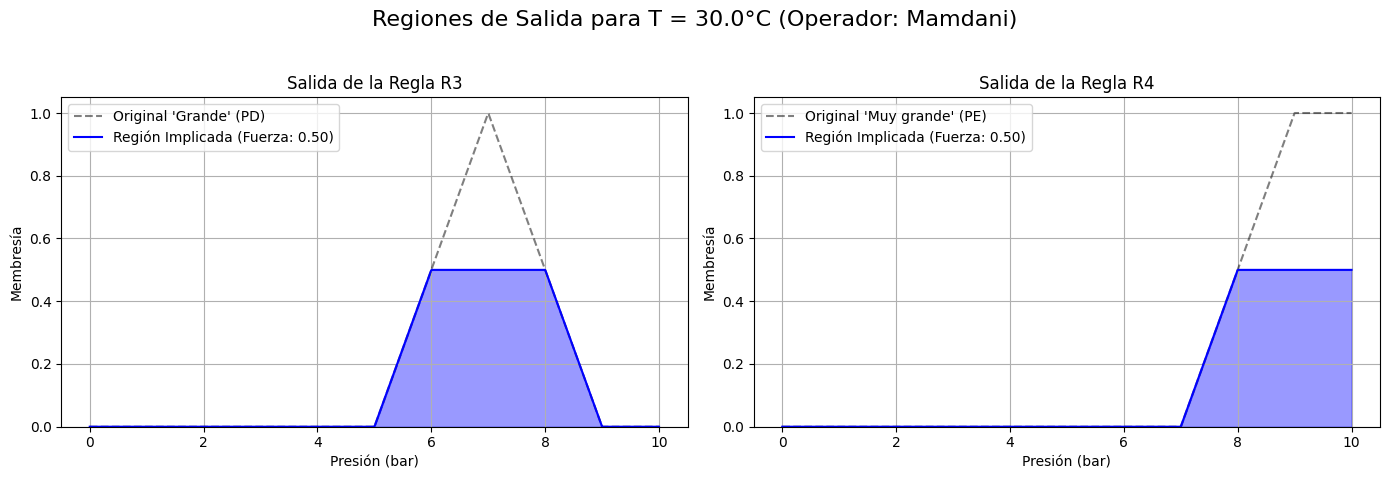

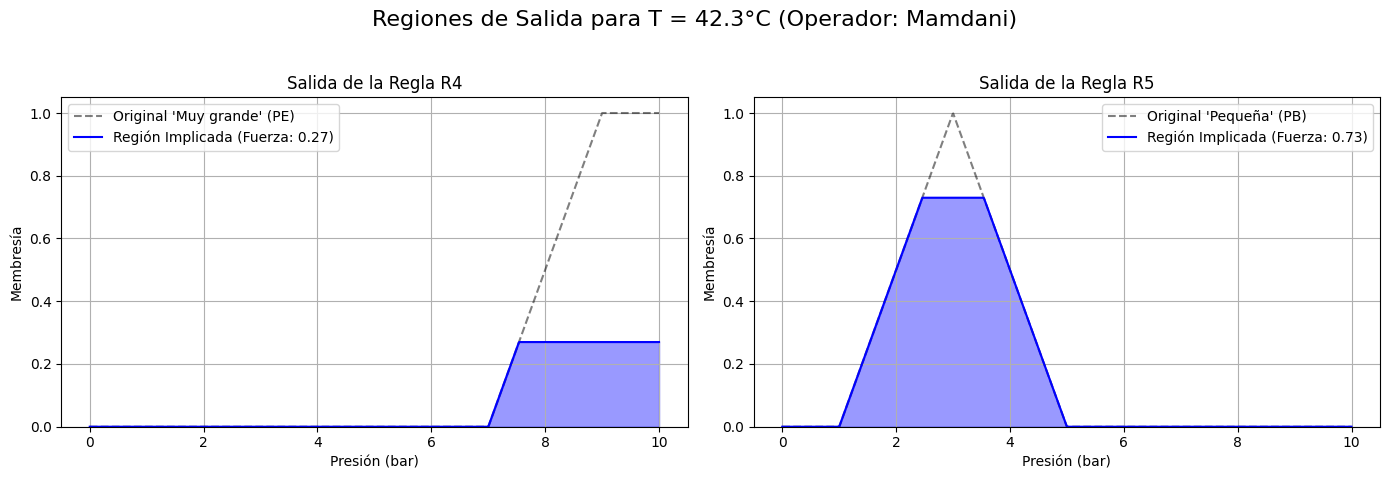

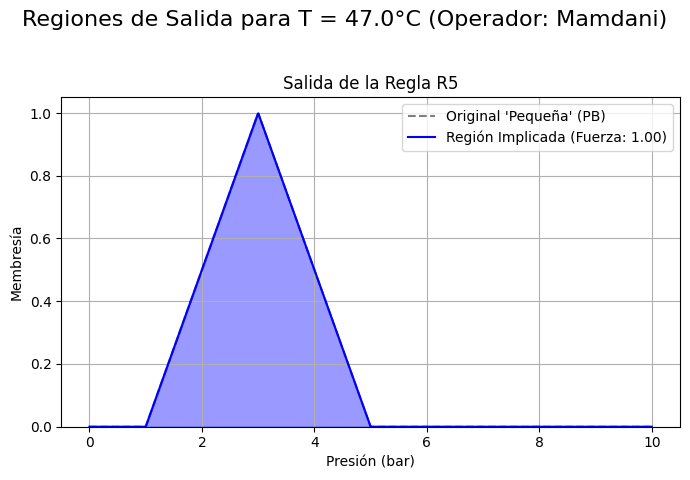

In [ ]:
def visualizar_regiones(temp, regiones_implicadas, activadas, operador):
    """
    Visualiza las regiones de salida implicadas para una temperatura dada.
    """
    num_reglas = len(regiones_implicadas)
    if num_reglas == 0:
        return

    fig, axes = plt.subplots(1, num_reglas, figsize=(7 * num_reglas, 5), squeeze=False)
    fig.suptitle(f'Regiones de Salida para T = {temp}°C (Operador: {operador})', fontsize=16)

    for i, (id_regla, region) in enumerate(regiones_implicadas.items()):
        ax = axes[0, i]
        
        # Datos de la regla
        datos_regla = activadas[id_regla]
        fuerza = datos_regla['fuerza']
        id_consecuente = datos_regla['consecuente']
        datos_consecuente = conjuntos_P[id_consecuente]
        
        # Conjunto de salida original
        conjunto_original = membresia_difusa(universo_pres, datos_consecuente['tipo'], datos_consecuente['parametros'])

        # Gráfico
        ax.plot(universo_pres, conjunto_original, 'k--', alpha=0.5, label=f"Original '{datos_consecuente['nombre']}' ({id_consecuente})")
        ax.fill_between(universo_pres, region, color='b', alpha=0.4)
        ax.plot(universo_pres, region, 'b', label=f"Región Implicada (Fuerza: {fuerza:.2f})")
        ax.set_title(f'Salida de la Regla {id_regla}')
        ax.set_xlabel('Presión (bar)')
        ax.set_ylabel('Membresía')
        ax.legend()
        ax.grid(True)
        ax.set_ylim(0, 1.05)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Generar los gráficos para Mamdani
for temp in temperaturas_entrada:
    visualizar_regiones(temp, regiones_mamdani[temp], resultados_analisis[temp], "Mamdani")

## 5. Inferencia con Operador de Zadeh

El ejercicio 4 pide repetir el proceso considerando el operador de Zadeh. En el contexto de la composición de reglas difusas, el método de Zadeh (a menudo llamado `max-min`) utiliza el operador `min` para la implicación, de la misma manera que lo hace Mamdani. La fórmula de implicación de Zadeh es $\mu_{A \to B}(x, y) = \min(\mu_A(x), \mu_B(y))$. Al aplicar la inferencia (Modus Ponens Generalizado), el resultado para el conjunto de salida es $\mu_{B'}(y) = \min(\alpha, \mu_B(y))$, donde $\alpha$ es la fuerza de activación.

Esto significa que, para el propósito de este ejercicio, **el resultado de la implicación de Zadeh es idéntico al de Mamdani**.

A continuación, se replica el proceso y se generan los gráficos correspondientes, que serán visualmente iguales a los del punto anterior.

Se han calculado las regiones de salida usando el operador de Zadeh.


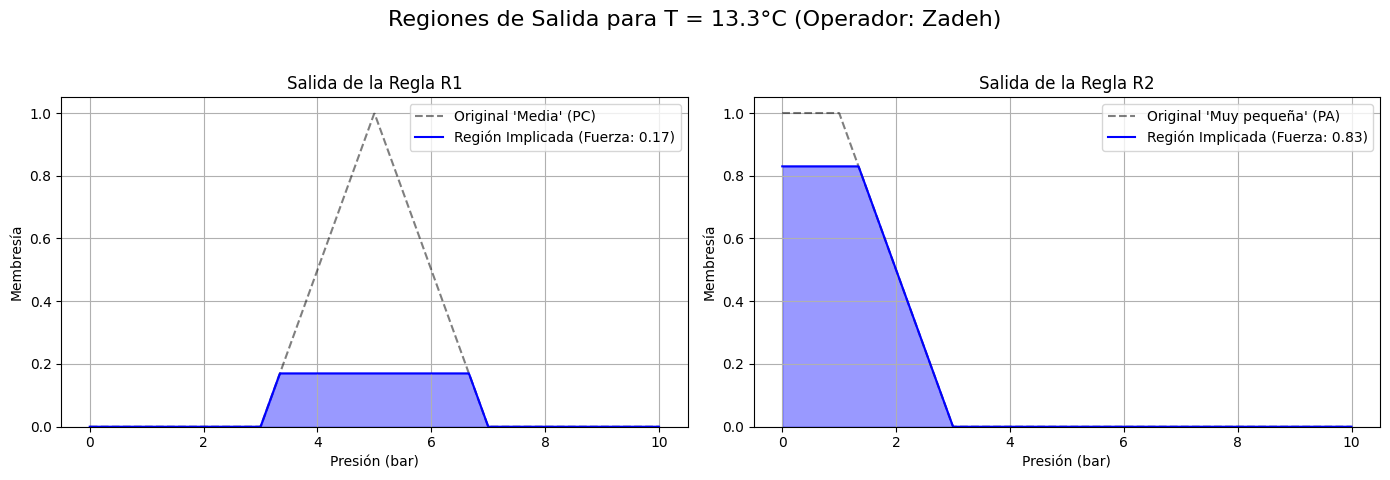

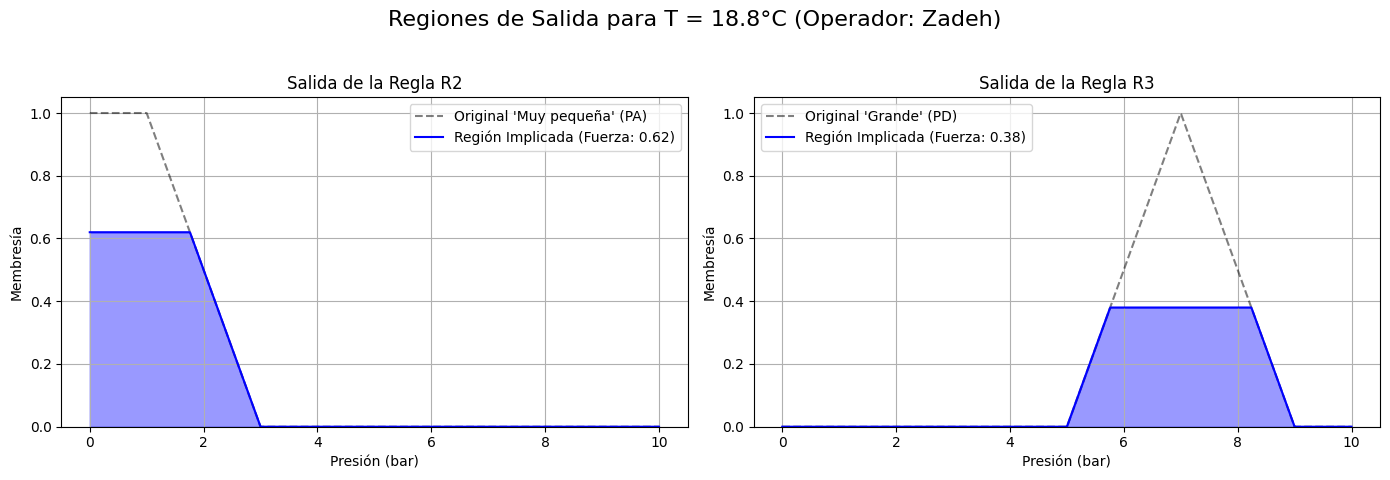

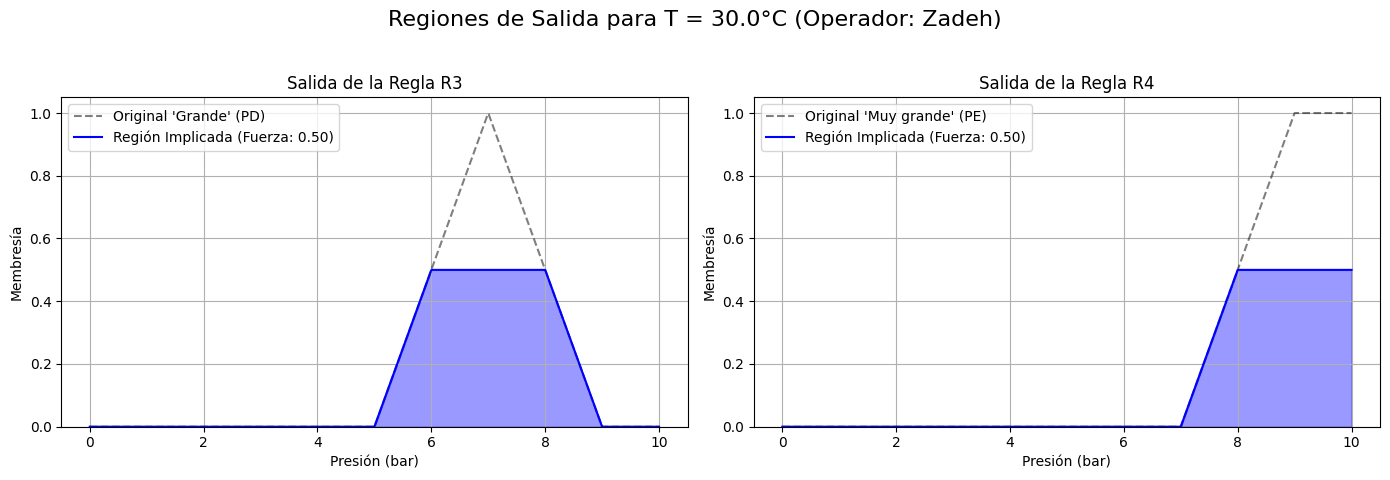

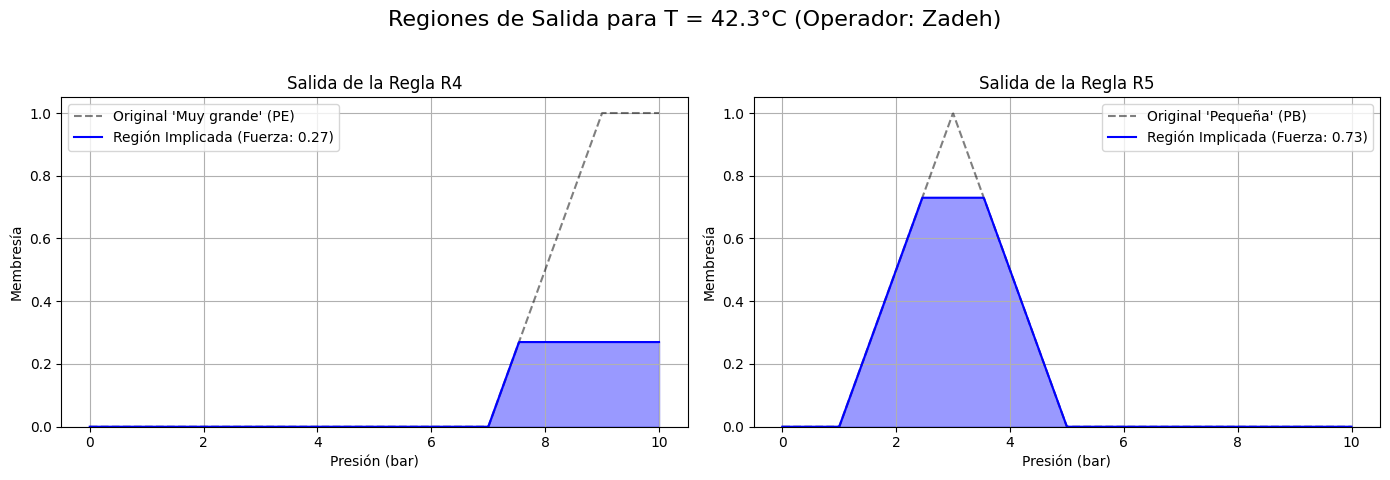

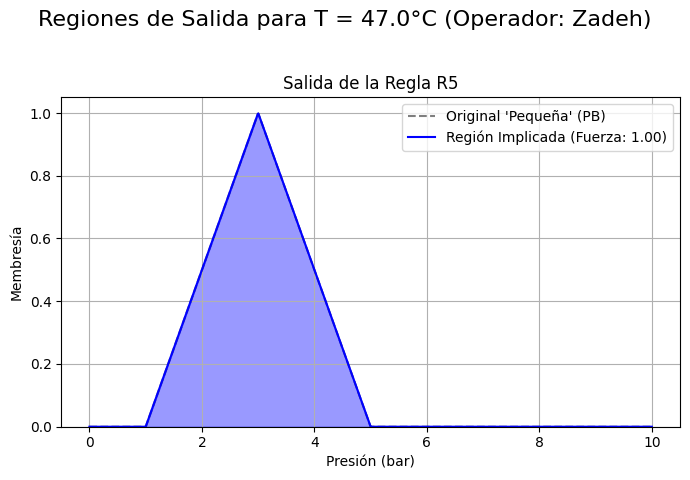

In [ ]:
def implicacion_zadeh(fuerza, conjunto_salida):
    """
    Aplica el operador de implicación de Zadeh (min), que es funcionalmente
    idéntico a Mamdani para este tipo de inferencia.
    """
    return np.minimum(fuerza, conjunto_salida)

# Calcular las regiones de salida para cada temperatura usando Zadeh
regiones_zadeh = {}
for temp, activadas in resultados_analisis.items():
    regiones_temp = {}
    for id_regla, datos_regla in activadas.items():
        fuerza = datos_regla['fuerza']
        id_consecuente = datos_regla['consecuente']
        
        datos_consecuente = conjuntos_P[id_consecuente]
        conjunto_salida_original = membresia_difusa(universo_pres, datos_consecuente['tipo'], datos_consecuente['parametros'])
        
        region_implicada = implicacion_zadeh(fuerza, conjunto_salida_original)
        regiones_temp[id_regla] = region_implicada
        
    regiones_zadeh[temp] = regiones_temp

print("Se han calculado las regiones de salida usando el operador de Zadeh.")

# Generar los gráficos para Zadeh
for temp in temperaturas_entrada:
    visualizar_regiones(temp, regiones_zadeh[temp], resultados_analisis[temp], "Zadeh")

## 6. Inferencia con Operador de Larsen

Finalmente, el ejercicio 5 pide repetir el proceso utilizando el operador de Larsen. Este método emplea el **producto algebraico** para la implicación. En lugar de "recortar" el conjunto de salida como hace Mamdani, el método de Larsen lo "escala".

La fórmula de implicación es:
$$ \mu_{B'}(y) = \alpha \times \mu_B(y) $$
donde $\alpha$ es la fuerza de activación de la regla y $\mu_B(y)$ es la función de pertenencia del conjunto consecuente.

Este enfoque preserva la forma original del conjunto de salida, pero reduce su altura máxima al valor de la fuerza de activación.

Se han calculado las regiones de salida usando el operador de Larsen.


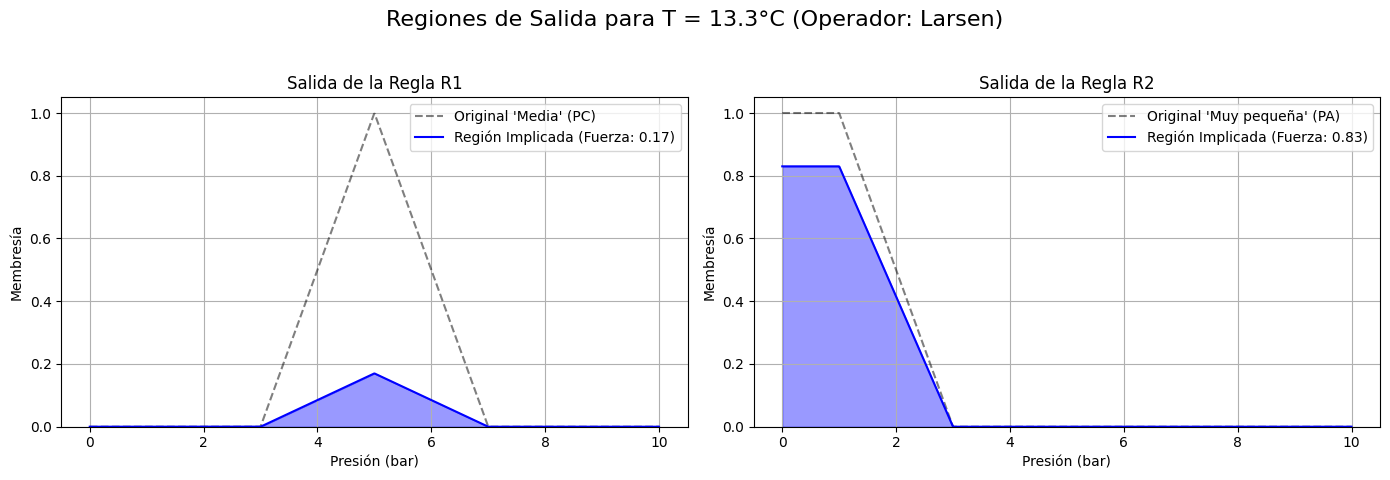

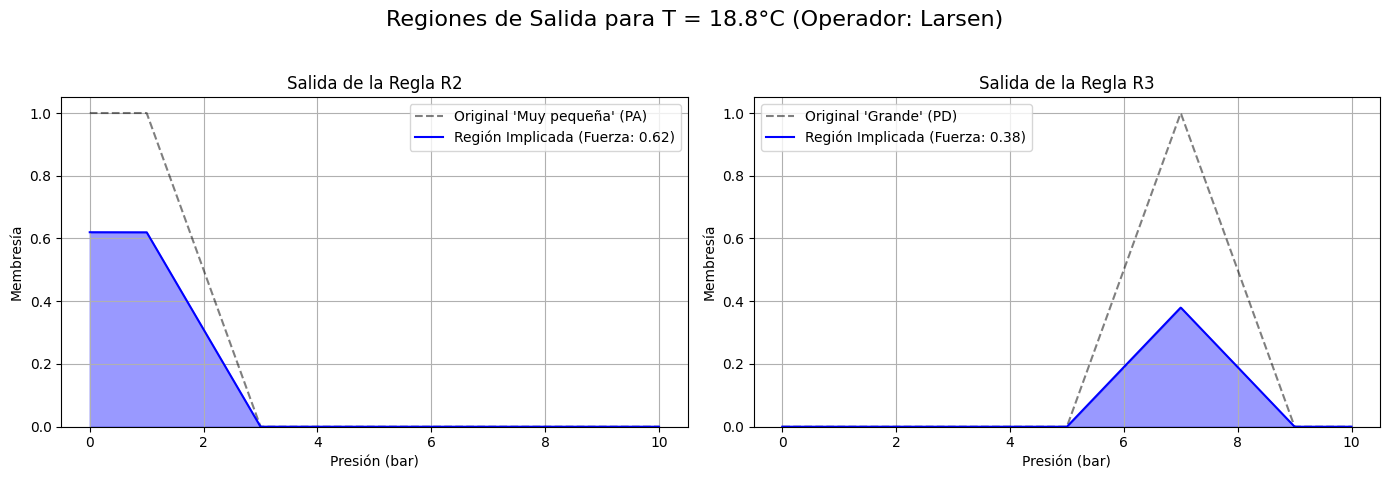

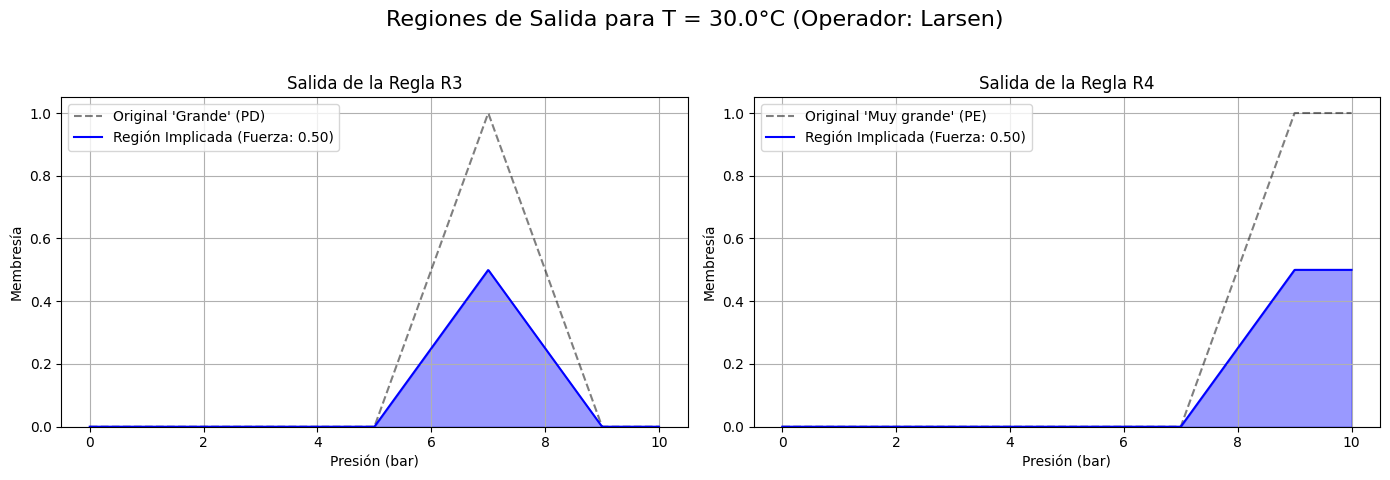

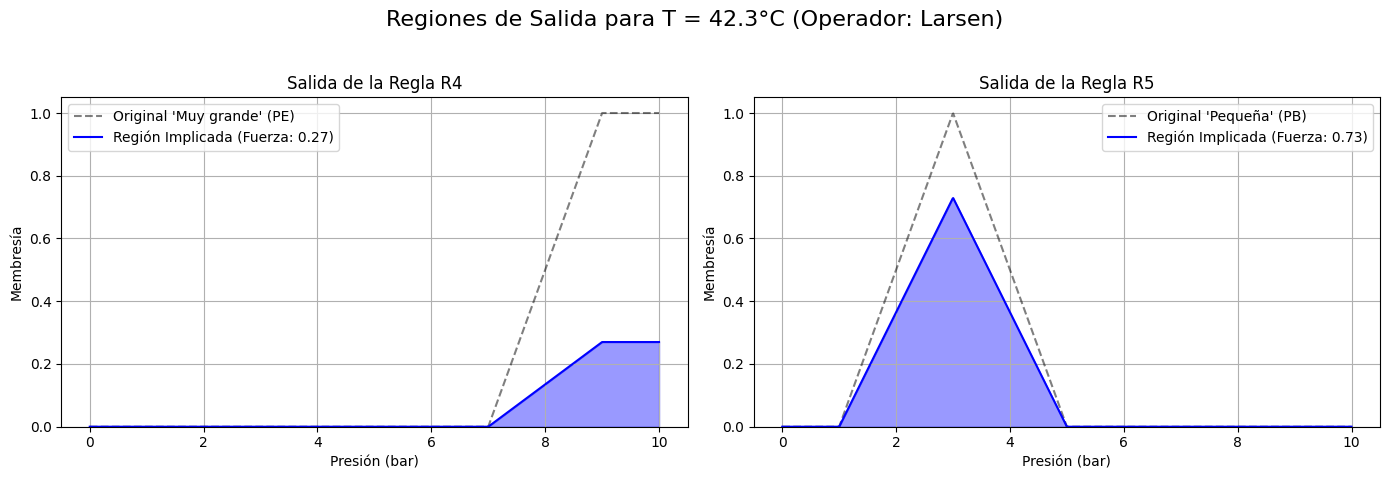

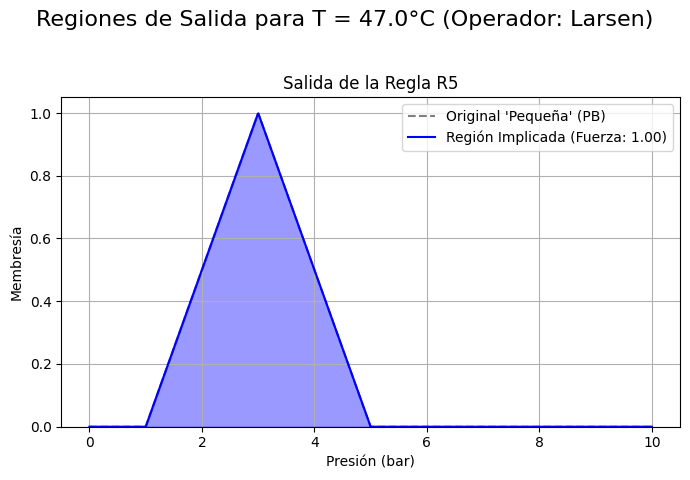

In [ ]:
def implicacion_larsen(fuerza, conjunto_salida):
    """
    Aplica el operador de implicación de Larsen (producto algebraico).
    Escala el conjunto de salida por la fuerza de activación.
    """
    return fuerza * conjunto_salida

# Calcular las regiones de salida para cada temperatura usando Larsen
regiones_larsen = {}
for temp, activadas in resultados_analisis.items():
    regiones_temp = {}
    for id_regla, datos_regla in activadas.items():
        fuerza = datos_regla['fuerza']
        id_consecuente = datos_regla['consecuente']
        
        datos_consecuente = conjuntos_P[id_consecuente]
        conjunto_salida_original = membresia_difusa(universo_pres, datos_consecuente['tipo'], datos_consecuente['parametros'])
        
        # Aplicar implicación de Larsen
        region_implicada = implicacion_larsen(fuerza, conjunto_salida_original)
        regiones_temp[id_regla] = region_implicada
        
    regiones_larsen[temp] = regiones_temp

print("Se han calculado las regiones de salida usando el operador de Larsen.")

# Generar los gráficos para Larsen
for temp in temperaturas_entrada:
    visualizar_regiones(temp, regiones_larsen[temp], resultados_analisis[temp], "Larsen")